In [1]:
# import librries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# import coin datas
import yfinance as yf
xmr = yf.Ticker("XMR-USD")
df_xmr = yf.download(tickers = "XMR-USD",
                     start = "2022-09-07",
                     end = "2023-09-09" , 
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [3]:
df_xmr.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-04,140.842804,143.770203,140.776291,141.170868,141.170868,63835398
2023-09-05,141.176682,141.299179,137.673279,137.781372,137.781372,54468002
2023-09-06,137.780243,142.644989,137.635544,142.113235,142.113235,67734044
2023-09-07,142.107117,143.275955,141.168930,143.250748,143.250748,62422431
2023-09-08,143.257370,144.124344,140.928955,143.886154,143.886154,46927009


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score , r2_score , recall_score , precision_score
from sklearn.model_selection import train_test_split

In [6]:
# find best number of neighbors and number of days for accuracy
n_days = 15
n_neigh = 8
## arrays that have scores for train data
recall_train = []
f1_train = []
precision_train = []
## arrays that have scores for validation data
recall_val = []
f1_val = []
precision_val = []
for h in range(1,n_days) :
    f_sc = 0 
    r_sc = 0
    p_sc = 0
    nn = 0
    f_t = 0
    r_t = 0 
    p_t = 0
    n_t = 0
    ## calc scores for diffenrent number of neighbors
    for t in range(2,n_neigh) :
        kll = []
        y_change = []
        ## make input array ( N days befor a day )
        for i in range(h,len(df_xmr)) : 
            g =[ df_xmr.iloc[j]["Close"] for j in range(i-h,i) ]
            kll.append(g)
        ## make labels for data
        for i in range(1,len(df_xmr)) : 
            y_change.append(df_xmr.iloc[i]["Close"] > df_xmr.iloc[i-1]["Close"])
        ## make train and validation data
        x_tr , x_val , y_tr , y_val = train_test_split(kll , y_change[h-1:] , test_size = 0.3 , random_state = 42)
        ## make knn model with n_neighbors=t and train
        knn_10 = KNeighborsClassifier(n_neighbors=t)
        knn_10.fit(x_tr,y_tr)
        # predict train and validation data 
        y_10 = knn_10.predict(x_tr)
        y_t = knn_10.predict(x_val)
        ## calc scores for train data
        ff_sc = f1_score(y_true=y_tr , y_pred = y_10)
        rr_sc = recall_score(y_true=y_tr , y_pred = y_10)
        pp_sc = precision_score(y_true=y_tr , y_pred = y_10)
        ## find max of scores for train data
        big = ff_sc > f_sc
        big_t = ff_sc > f_sc
        nn = t if big else nn
        f_sc = ff_sc if big else f_sc
        r_sc = rr_sc if big else r_sc
        p_sc = pp_sc if big else p_sc
        ## scores for vlidation data
        f_tt = f1_score(y_true = y_val , y_pred= y_t)
        r_tt = recall_score(y_true = y_val , y_pred= y_t)
        p_tt = precision_score(y_true = y_val , y_pred= y_t)
        ## find max scores for validation data
        n_t = t if big_t else n_t
        f_t = f_tt if big_t else f_t
        r_t = r_tt if big_t else r_t
        p_t = p_tt if big_t else p_t
    print("for train data : ")
    print("n_days:" , h, "     n_neighbors:",  nn  , ":" )
    print(f_sc)
    print(r_sc)
    print(p_sc)
    print("for validation data : ") 
    print("n_days:" , h, "     n_neighbors:",  n_t , ":" )
    print(f_t)
    print(r_t)
    print(p_t)
    ## add scores to arrays
    f1_train.append(f_sc)
    recall_train.append(r_sc)
    precision_train.append(p_sc)
    f1_val.append(f_t)
    recall_val.append(r_t)
    precision_val.append(p_t)
    print("*********************************************************************8")

for train data : 
n_days: 1      n_neighbors: 3 :
0.762589928057554
0.7737226277372263
0.75177304964539
for validation data : 
n_days: 1      n_neighbors: 3 :
0.6212121212121212
0.6307692307692307
0.6119402985074627
*********************************************************************8
for train data : 
n_days: 2      n_neighbors: 3 :
0.7900355871886121
0.8161764705882353
0.7655172413793103
for validation data : 
n_days: 2      n_neighbors: 3 :
0.6315789473684211
0.6461538461538462
0.6176470588235294
*********************************************************************8
for train data : 
n_days: 3      n_neighbors: 3 :
0.7788778877887789
0.8137931034482758
0.7468354430379747
for validation data : 
n_days: 3      n_neighbors: 3 :
0.5573770491803278
0.6181818181818182
0.5074626865671642
*********************************************************************8
for train data : 
n_days: 4      n_neighbors: 3 :
0.8013245033112584
0.8642857142857143
0.7469135802469136
for validation data : 
n_d

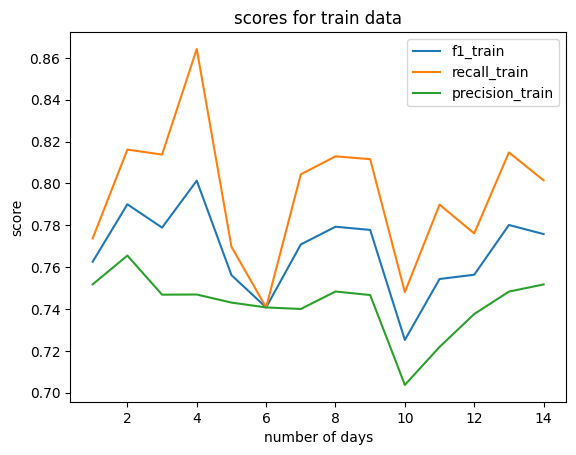

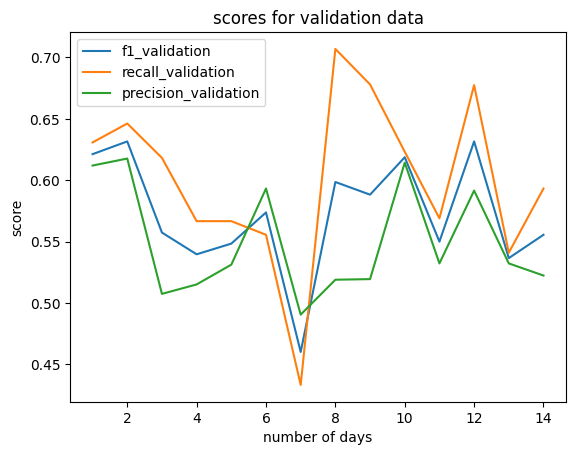

In [11]:
## plot scores for train data
plt.title("scores for train data")
plt.plot([i for i in range(1,n_days)] , f1_train , label = "f1_train")
plt.plot([i for i in range(1,n_days)] , recall_train , label = "recall_train")
plt.plot([i for i in range(1,n_days)] , precision_train , label = "precision_train")
plt.xlabel("number of days")
plt.ylabel("score")
plt.legend()
plt.show()
## plot scores for validation data
plt.title("scores for validation data")
plt.plot([i for i in range(1,n_days)] , f1_val , label = "f1_validation")
plt.plot([i for i in range(1,n_days)] , recall_val , label = "recall_validation")
plt.plot([i for i in range(1,n_days)] , precision_val , label = "precision_validation")
plt.xlabel("number of days")
plt.ylabel("score")
plt.legend()
plt.show()

In [11]:
# create model with best params
best_n_days = 2
bes_n_neigh = 3 
kll_final = []
y_change_final = []
for i in range(best_n_days,len(df_xmr)) : 
    g =[ df_xmr.iloc[j]["Close"] for j in range(i-best_n_days,i) ]
    kll_final.append(g)
for i in range(1,len(df_xmr)) : 
    y_change_final.append(df_xmr.iloc[i]["Close"] > df_xmr.iloc[i-1]["Close"])
knn_10 = KNeighborsClassifier(n_neighbors=bes_n_neigh)
knn_10.fit(kll_final,y_change_final[best_n_days-1:])
y_10_final = knn_10.predict(kll_final)

In [12]:
## f1 score for train data
ff_sc = f1_score(y_true=y_change_final[best_n_days-1:] , y_pred = y_10_final)
print(ff_sc)

0.8179669030732861


In [13]:
# download test data
df_xmr_test = yf.download(tickers = "XMR-USD",
                     start = "2023-09-04",
                     end = "2023-10-07" , 
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [15]:
## create input and output test data
kll_t = []
y_t = []
for i in range(best_n_days,len(df_xmr_test)) : 
    g = [df_xmr_test.iloc[j]["Close"] for j in range(i-best_n_days,i)]
    kll_t.append(g)
for i in range(1,len(df_xmr_test)) : 
    y_t.append(df_xmr_test.iloc[i]["Close"] > df_xmr_test.iloc[i-1]["Close"])

## predict output using trained model
y_pred_t = knn_10.predict(kll_t)

In [16]:
## scores for test data
ff_t = f1_score(y_true=y_t[best_n_days-1:] , y_pred = y_pred_t)
rr_t = recall_score(y_true=y_t[best_n_days-1:] , y_pred = y_pred_t)
pp_t = precision_score(y_true=y_t[best_n_days-1:] , y_pred = y_pred_t)
print("f1 score on test data :" , ff_t)
print("recall score on test data :" , rr_t)
print("precision score on test data :" , pp_t)

f1 score on test data : 0.717948717948718
recall score on test data : 0.7368421052631579
precision score on test data : 0.7
